<b>Olympic Data Analysis - Summer Games 1896-2008</b>

An analysis of Olympic Medals Won in Summer Olympic Games between 1896 and 2008

*Data Obtained from The Guardian (https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data)



In [34]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
#load in medal data
medals = pd.read_csv('C:\Anaconda\MEDALISTS.csv'
                     , header=4, parse_dates=True)

print(medals.head())


     City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver  


In The Guardian's Dataset, there is a data entry problem. The following code shows where the problem is and fixes it.

In [36]:
#Tracking down a spurious value in the gender column with groupby and aggregation by count:

# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

#using the knowledge returned above we can write a script to find the row with the bad data:
# Create the Boolean Series: sus
sus = ((medals['Event_gender'] == 'W') & (medals['Gender'] == 'Men'))

# Create a DataFrame with the suspicious row: suspect
suspect = medals.loc[sus]

# Print suspect
print(str(suspect) + ' is a suspect data point')



#fix gender value in row 23675, data entry error
medals.set_value(23675, 'Gender', 'Women')

print(medals.Gender[23675])


                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  
         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  B

<center><b>Top Medal Winning Countries</b></center>

In [37]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


<center><b>Top Medal Winning Countries by Medal Type</b></center>

In [38]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values(by='totals', axis=0, ascending=False)


# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


<center><b>How Many Unique Event Gender/Gender Combinations are There?</b></center>

In [39]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

    Event_gender Gender
0              M    Men
348            X    Men
416            W  Women
639            X  Women


<center><b>Counting How Many Unique Sports a Country Has Medalled In</b></center>

Number of Unique Sports in Which This Country Has Won Medals
NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64
 
 
Most Countries Have Won Medals in Few or No Sports


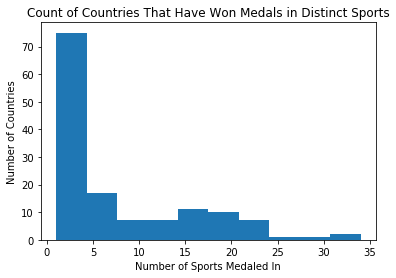

In [43]:
#Group the Olympic medal data by country sum up medals by Sport rank most to least:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print('Number of Unique Sports in Which This Country Has Won Medals')
print(Nsports.head(15))

Nsports.plot(kind='hist', title='Count of Countries That Have Won Medals in Distinct Sports');
plt.xlabel('Number of Sports Medaled In');
plt.ylabel('Number of Countries');

print(" ")
print(" ")
print('Most Countries Have Won Medals in Few or No Sports')

<center><b>Who Won the Great Olympic Rivalry Between the USA and the USSR in the Cold War Era?</b></center>

In [44]:
#isolating the Cold War Era Olympic games and getting medal data on only the USA and USSR
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print('Number of Unique Sports Medalled in by USA and USSR during the Cold War Era:')
print(Nsports)

#find out which country had the most athletes winning medals in the cold war era
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

print('USA or USSR: Who won the most medals in each editon of the Summer Olympics in the Cold War Era:')
print(most_medals)

# Print most_medals.value_counts()
print('Who "Won" More Editions of the Summer Olympics During the Cold War Era?:')
print(most_medals.value_counts())

Number of Unique Sports Medalled in by USA and USSR during the Cold War Era:
NOC
URS    21
USA    20
Name: Sport, dtype: int64
USA or USSR: Who won the most medals in each editon of the Summer Olympics in the Cold War Era:
Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object
Who "Won" More Editions of the Summer Olympics During the Cold War Era?:
URS    8
USA    2
dtype: int64


<center><b>The Good Old US of A</b></center>

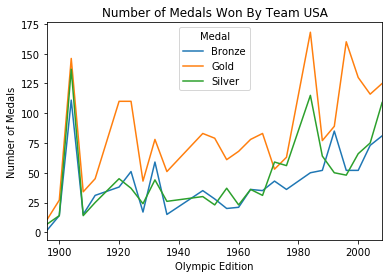

In [49]:
# Create the DataFrame: usa
usa = medals.loc[medals.NOC.isin(['USA'])]

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot();
plt.title('Number of Medals Won By Team USA');
plt.xlabel('Olympic Edition');
plt.ylabel('Number of Medals');


<center><b>Gender Equality in the Summer Games</b></center>

You may have noticed that women did not participate in the first Summer Games of 1896.  Since then, how has gender involvement in the Olympics changed? 

In [46]:


transformed = medals.pivot_table(index = 'Edition',
                                 values = 'Sport',
                                 columns= 'Gender', 
                                 aggfunc='count')
print('Transformed')
print(transformed)

Transformed
Gender      Men  Women
Edition               
1896      151.0    NaN
1900      501.0   11.0
1904      458.0   12.0
1908      789.0   15.0
1912      855.0   30.0
1920     1255.0   43.0
1924      833.0   51.0
1928      615.0   95.0
1932      555.0   60.0
1936      791.0   84.0
1948      718.0   96.0
1952      750.0  139.0
1956      739.0  146.0
1960      737.0  145.0
1964      820.0  190.0
1968      819.0  212.0
1972      947.0  238.0
1976      924.0  381.0
1980      958.0  429.0
1984      973.0  486.0
1988     1011.0  535.0
1992     1105.0  600.0
1996     1082.0  777.0
2000     1125.0  890.0
2004     1099.0  899.0
2008     1110.0  932.0


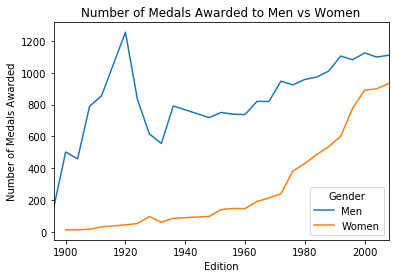

In [48]:
transformed.plot(kind='line');
plt.title('Number of Medals Awarded to Men vs Women');
plt.ylabel('Number of Medals Awarded');